Hello everyone, good day, I'm Tejas. So this project is about QNLP and Music Composition. What I explored is how these 2 terms fit together, and specifically what role lambeq has to play in this process. 

So what I aimed to do was prepare the uninitiated as to how actually the paper worked, because it is indeed quite vast, it draws from 3 fields: category theory, natural language processing and quantum computing. A great deal of time was spent struggling to figure out how it all fit together.

So I've made: 
1. this notebook explaining the lambeq pipeline, i.e from sentence to circuit to results, drawing parallels between English grammar and musical grammar

2. There is also another notebook experimenting with the different functionalities that lambeq has to offer, such as the different readers and also playing around with the ansatz parameters. 

3. The 3rd notebook is the QNLP experiment which I ran on classifying pairs of sentences.

4. Finally, I also wrote a brief write up about another paper, showing how word embeddings, which are also used in lambeq, are used for automatic equalization in audio mixing, for example making songs sound more "bright", "soft", "clear", "crisp" etc by adjusting the frequencies of the audio. 

# What is lambeq?
---
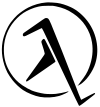

Lambeq is an open-source, modular, extensible high-level **Python library** for experimental Quantum Natural Language Processing **(QNLP)**, created by **Cambridge Quantum’s QNLP team**. At a high level, the library allows the **conversion of any sentence to a quantum circuit**, based on a given **compositional model** and certain parameterisation and choices of **ansätze**, and facilitates training for both quantum and classical NLP experiments.

## What does it have to do with Music?

We have to first understand that music is being treated as a language here. 

Similar to how the English language has grammar which gives us the relationships between the **"atomic types"**(as it referred to in DisCopy) such as nouns, prepositions, adjectives, verbs and so on, we can define the **"grammar" of music** however we want, granted we adhere to some rudimentary musical rules. 


---
## How is it used in QNLP?
Lambeq; at this stage is mainly used for **classification** of sentences.

So, previously in the English language, experiments were done to perform binary classification on sentences.

For example, classifying sentences such as "cook creates complicated dish" and "programmer creates advanced code" into 2 different categories, either **Food or IT**. . 

In this paper, similar sentiment analysis has been done, but in a more musical manner. Compositions were classified into 2 categories, either **rhythmic or melodic**.




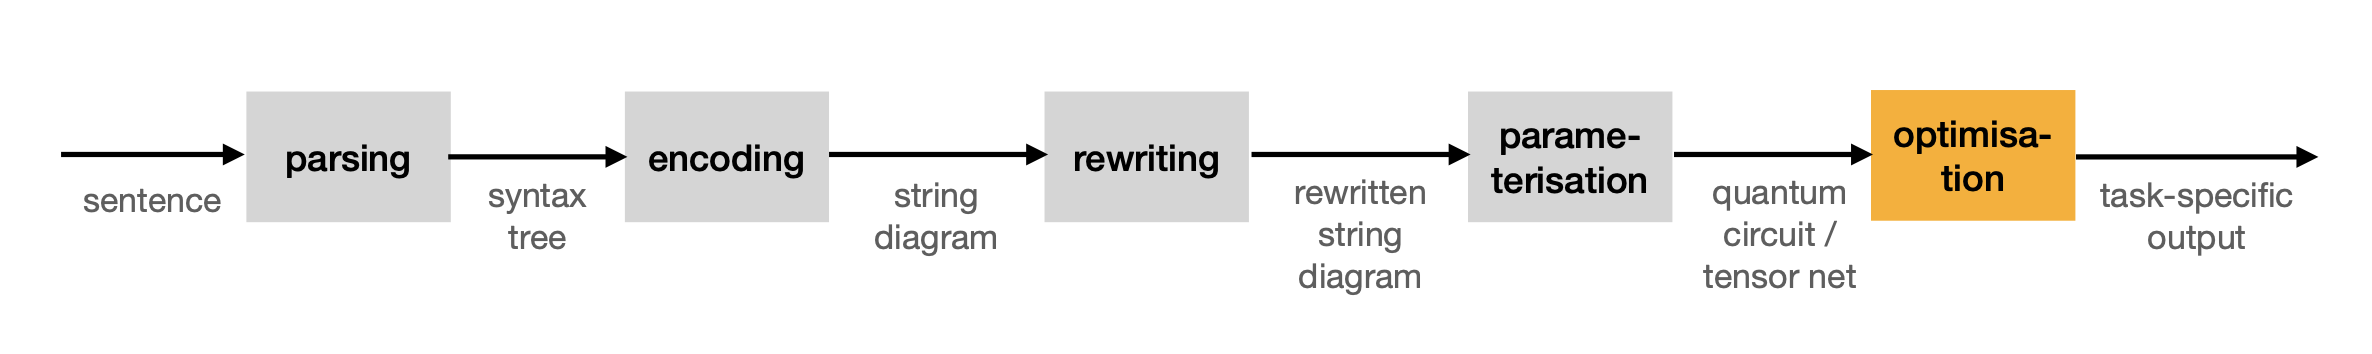


So these are the main 5 steps in lambeq, and understanding this pipeline will guide us through the paper.

## The Main Pipeline

### 1. Parsing & Encoding

So Denisa talked about DisCoPy and DisCoCat, and how words/snippets are represented as monoidal categories, how they are represented graphically, as string diagrams.
So what parsing does is take a sentence in English, and make a syntax tree of it which is then represented graphically as a string diagram. 
This is done by the built-in BobcatParser in lambeq which parses sentences according to the DisCoCat compositional model. But since our musical grammar doesn't follow the rules of English, that is it doesn't have verbs, adjectives, nouns etc., in this paper they haven't used the BobcatParser but rather a custom one which follows the rules that we have explicitly defined, such as 

---
<center> <b>Julia goes to school in Rome</b> </center>

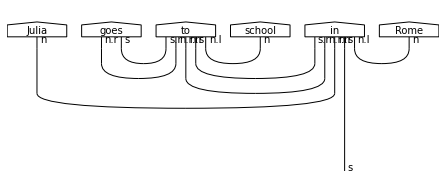

--- ---


<div>
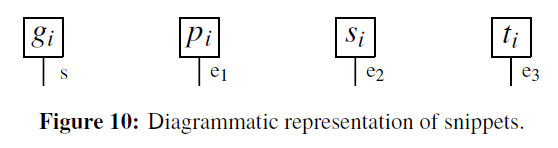
</div>

<div>
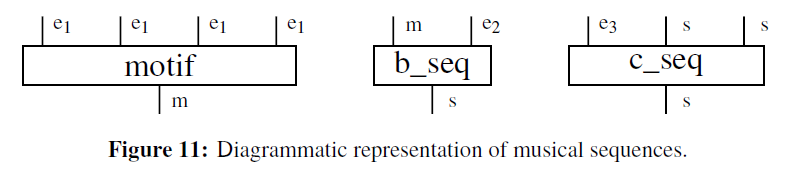
</div>

---


<div>
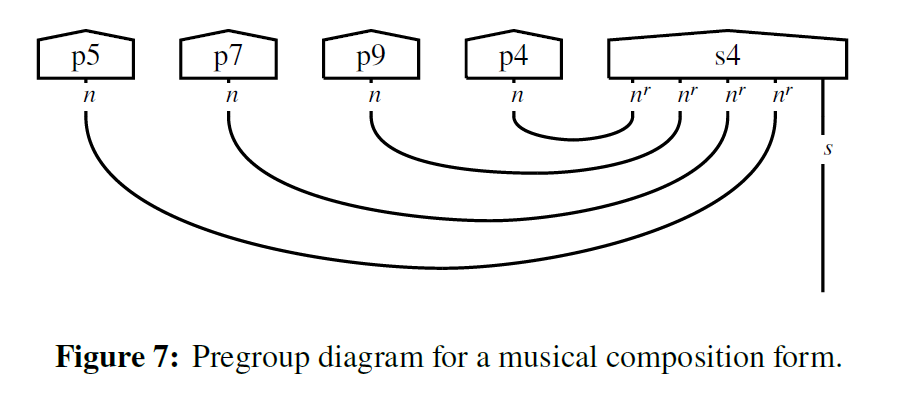
</div>

### 2. Rewriting

Sentences in their original form can become quite complex for a quantum circuit conversion, and will not be hardware and resource efficient. So, to preserve the core meaning of the sentence, and reduce the demands on the quantum hardware, they have devised certain rewrite rules. 
<div>
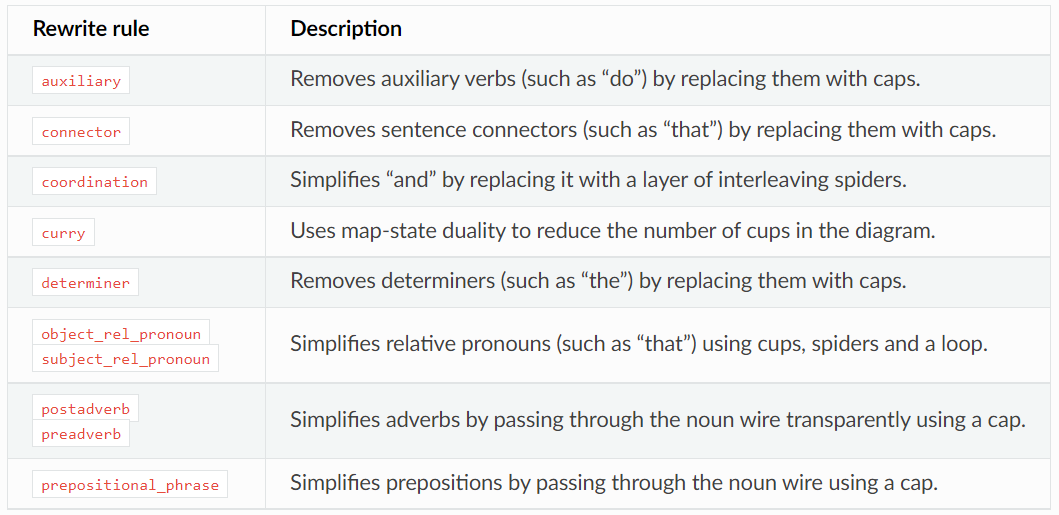
</div>

#### Original Diagram:
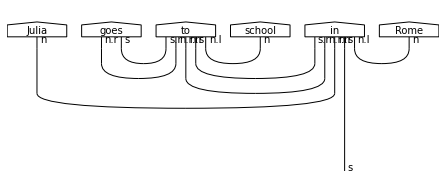

#### Optimized Diagram after rewriting:
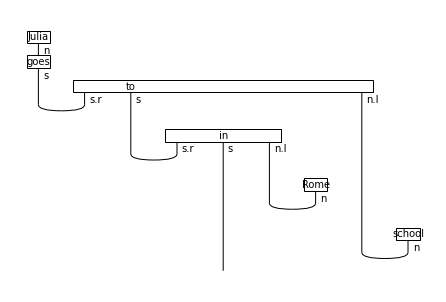

Out of these, most are used for NLP in the English language, but for us, the curry rewrite rule, which reduces the number of cups by using map-state duality, will be useful.
<div>
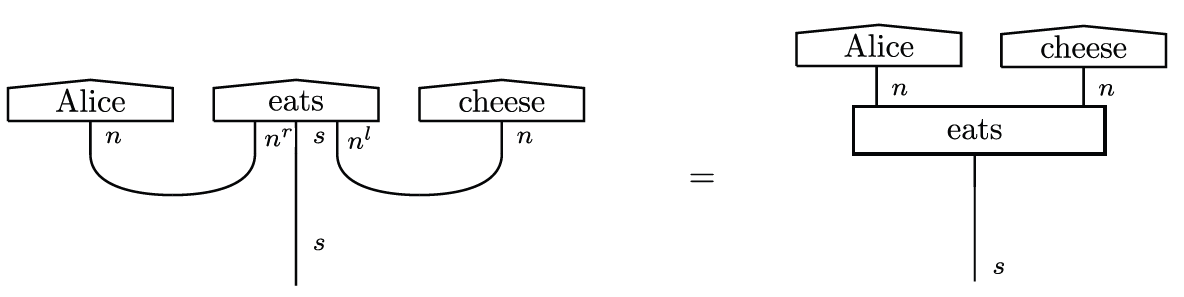
</div>
Reducing the number of cups will reduce the number of post-selections. The curry-rewrite rule, in conjunction with the discopy.normal_form() method, removes the cups from the string diagram. 

Their importance can be seen in the form of the snake equations, which is literally the heading image of discopy. 
<div>
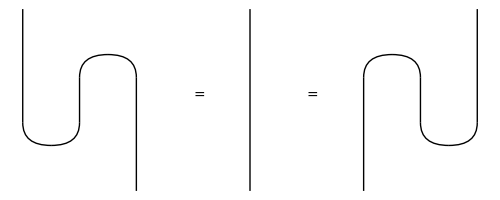
</div>


### 3. Parameterization and Circuit Conversion

This is where lambeq evolves from discopy. The string diagram is converted, after optimization, into a quantum circuit:

#### Optimized Diagram after rewriting:
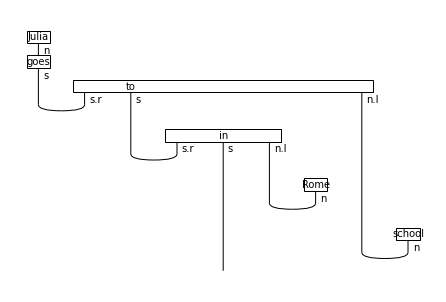

#### Quantum Circuit:
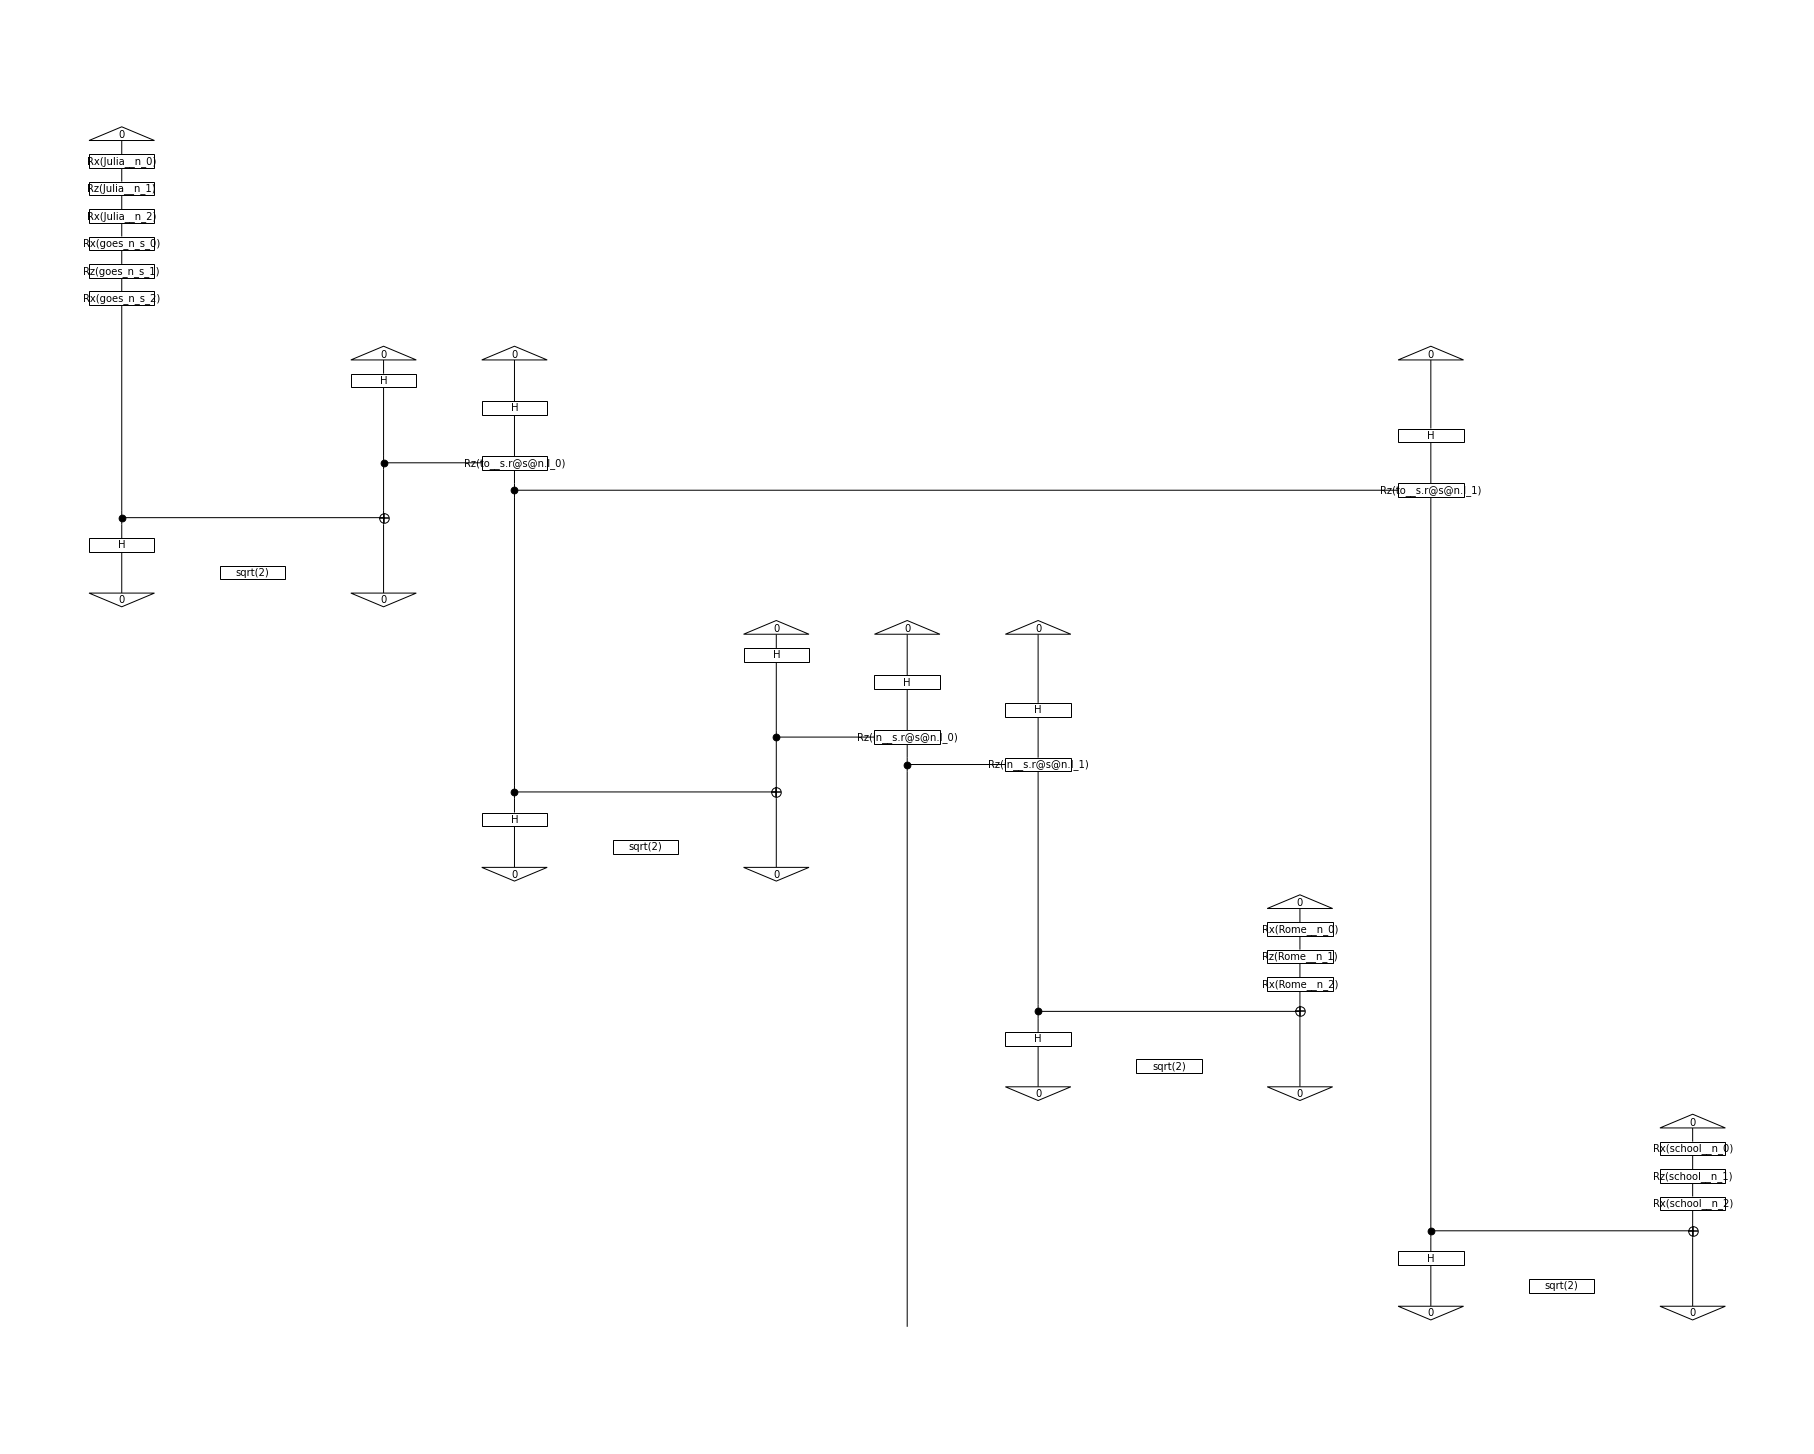

This is the circuit of the sentence, **"Julia goes to school in Rome"**.

This circuit conversion is done by the IQP Ansatz, which stands for Instantaneous Quantum Polynomial. 

Basically what this does is assigns a qubit state to the "noun" or the "snippet" which are the basic 1 unit types. For boxes, or transitive verbs, adjectives, or composite systems, which require a left or right adjoint according to the pregroup grammar, it uses controlled rotations, like the CZ or CNOT gate.  

One way to think of this is as word embeddings, where the words are being placed in a vector space, and the parameters are their direction in that space. 

Now these parameters are what the machine learning algorithm tunes. The values of these rotations, is what classifies the sentences. 


### 4. Training

Now that we have our circuits, what happens then? Then comes the classification. Assigning each musical composition a type, either rhythmic or melodic. What was done in the English language using lambeq was classifying sentences into 2 categories: either Food or IT. 

Now to reiterate, this was done by identifying the specific parameters on the words. For example, the qubit state associated with the word "chef" will be different than the qubit state associated with the word "programmer". Again, the word embeddings. Some words will be closer to each other in the vector space, and others will be farther away. 

In our musical case, the sequence might be classified by the qubit state associated with the type "e1" or "e3". 

How does it tune the parameters?

Using the cross-entropy loss function and the SPSA (Simultaneous Perturbation Stochastic Approximation) algorithm to minimize the loss function.

Let's take a look at an example of the parameters:

<div>
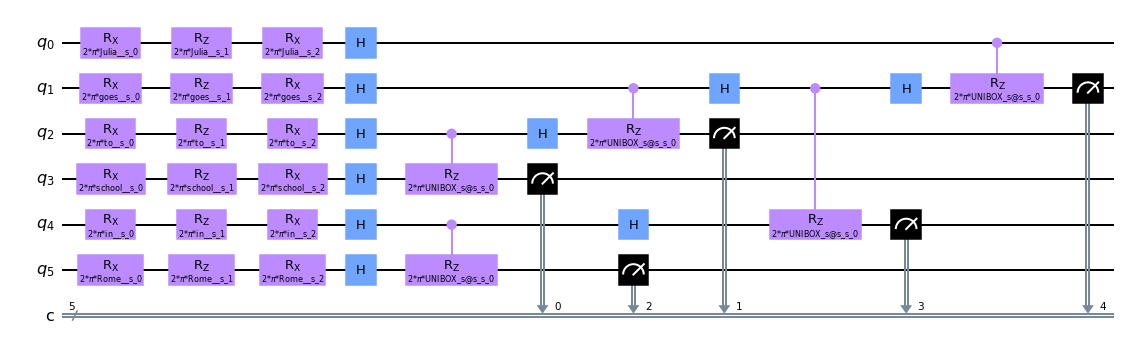
</div>

Now these symbols will be replaced by angle values. For example, if we give arbitrary values to the symbols, we might get a circuit like this:
<div>
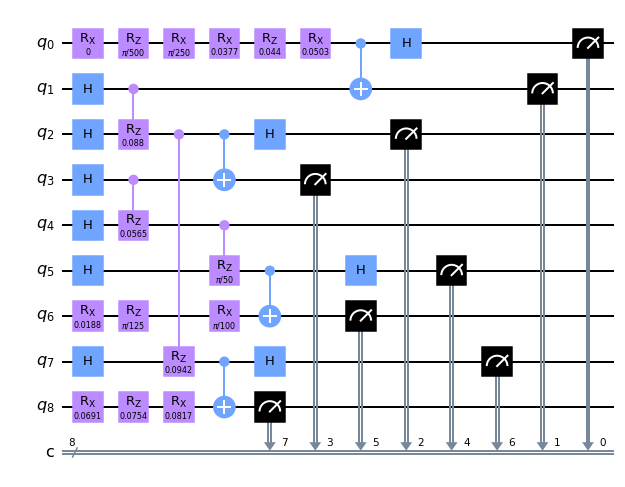
</div>


## My QNLP Experiment 

So, to get some practice and hands- on experience with QNLP and lambeq, the experiment which I did was to classify **pairs of sentences**, rather than just one. That means it was to figure out if the 2 sentences of the pair in the dataset belonged to the same category.

For e.g.

skilful programmer creates code, devoted hacker writes code, 1<br>
skilful cook creates meal, devoted hacker creates complicated code, 0

Such were the lines in the dataset, and there were 100 such pairs of sentences.

Using the BobcatParser, remove_cups rewrite rule, IQP ansatz and classical simulation using the NumPy model, the trainer was able to achieve 61% accuracy on the training data, and 64% accuracy on the test data. I trained the model for only 100 epochs, as more iterations were leading to overfitting, that is higher accuracy on the training data but lower accuracy on the test data.
___


<div>
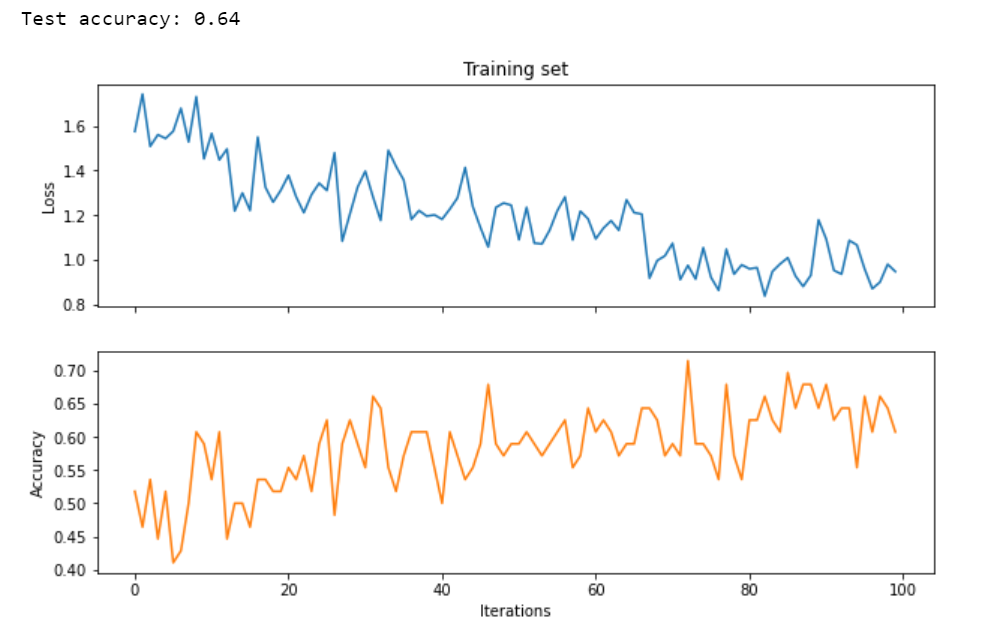
</div>

___

<div>
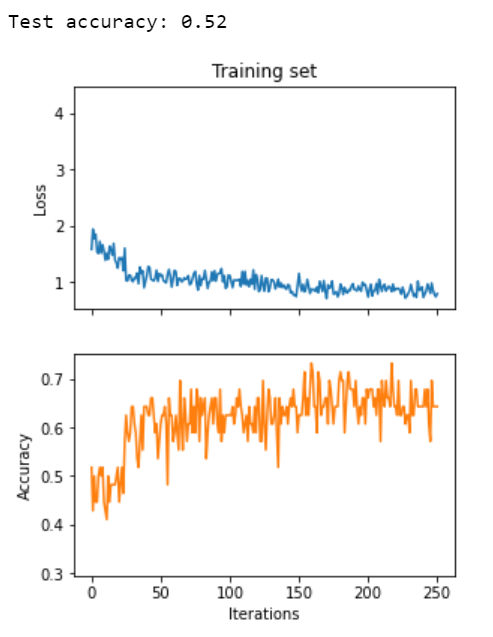
</div>

## Future Advancements in Lambeq and what that means for Music Composition

Lambeq is a rich and fertile space for development, even as we speak there is an open pull request for a new ansatz support. There is scope for expansion in new rewrite rules, anstaze and readers. This will allow Lambeq to tackle more and more complex sentences. In music this may translate to a more nuanced classification of compositions. Larger scale implementations on more qubits will allow for musical compositions of longer duration. 

Personally, I feel that the implementation of new readers will be of the greatest help to music composition, as it allows for new compositional models to be interpreted, which might change the very "feel" of the music.